In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [49]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 54s 5us/step


In [2]:
train_images=pd.read_csv('train.csv')

In [10]:
train_images.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y_train=train_images.iloc[:,0].values

In [11]:
train_images=train_images.drop('label',axis=1)

In [12]:
train_list=[]
for i in range(42000):
    img=train_images.iloc[i]
    img=np.array(img)
    img=img.reshape(28,28)
    train_list.append(img)
X_train=np.stack(train_list)

In [50]:
X_train.shape

(60000, 28, 28)

In [51]:
X_test.shape

(10000, 28, 28)

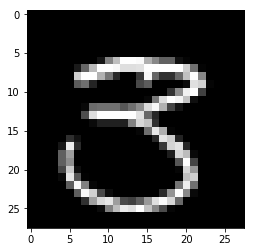

In [16]:
plt.imshow(X_train[7],cmap='gray')

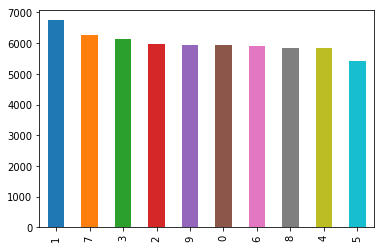

In [52]:
y_train_disp=pd.DataFrame({'categories':y_train})
y_train_disp['categories'].value_counts().plot.bar()

In [18]:
test_images=pd.read_csv('test.csv')

In [19]:
test_images.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test_list=[]
for i in range(28000):
    img=test_images.iloc[i]
    img=np.array(img)
    img=img.reshape(28,28)
    test_list.append(img)
X_test=np.stack(test_list)

In [21]:
X_test.shape

(28000, 28, 28)

In [53]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255.0
X_test /= 255.0
print('X_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])

X_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [54]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten,LeakyReLU
from keras.layers import Dense,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import regularizers

In [55]:
model = Sequential() 
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(X_train, y_train, batch_size=64,epochs=30)

Epoch 1/30
60000/60000 [==============================] - 7s 110us/step - loss: 0.2210 - acc: 0.9353
Epoch 2/30
60000/60000 [==============================] - 6s 108us/step - loss: 0.0867 - acc: 0.9735 0s - loss: 0.0
Epoch 3/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.0571 - acc: 0.9822
Epoch 4/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.0419 - acc: 0.9863
Epoch 5/30
60000/60000 [==============================] - 7s 109us/step - loss: 0.0331 - acc: 0.9892
Epoch 6/30
60000/60000 [==============================] - ETA: 0s - loss: 0.0268 - acc: 0.991 - 6s 93us/step - loss: 0.0268 - acc: 0.9912
Epoch 7/30
60000/60000 [==============================] - 6s 96us/step - loss: 0.0214 - acc: 0.9928
Epoch 8/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.0193 - acc: 0.9935
Epoch 9/30
60000/60000 [==============================] - 6s 99us/step - loss: 0.0179 - acc: 0.9941
Epoch 10/30
60000/60000 [=================

In [47]:
model.save('Classification-99%.h5')

In [58]:
y_pred=model.predict_classes(X_test)

In [43]:
ilist=1+np.arange(28000)
print(len(ilist))

28000


In [44]:
solution_dict={'ImageId':ilist,'Label':y_pred}

In [45]:
solution_dataframe=pd.DataFrame(solution_dict)

In [46]:
solution_dataframe.to_csv('soln.csv',index=False)

In [59]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix',cm)
print('Accuracy Score',accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report,f1_score
print('Classification Report \n',classification_report(y_test, y_pred))

Confusion Matrix [[ 971    1    0    0    1    0    3    3    1    0]
 [   1 1123    3    0    0    1    2    1    4    0]
 [   5    1 1008    4    2    0    2    4    5    1]
 [   0    0    5  993    0    2    0    5    1    4]
 [   0    0    3    1  968    1    4    1    2    2]
 [   2    0    0   11    1  871    4    1    1    1]
 [   3    2    1    1    4    6  940    0    1    0]
 [   1    2    6    1    4    0    0 1009    1    4]
 [   4    0    2    5    5    3    1    3  948    3]
 [   0    3    0    7   14    0    0    3    3  979]]
Accuracy Score 98.1
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      